<a href="https://colab.research.google.com/github/louzeiro/extraCurricular/blob/main/PythonStatisticsEssential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Statistics Essential
Fonte: https://www.linkedin.com/learning/python-statistics-essential-training/the-structure-of-data?autoplay=true&resume=false

# Acesso e tramento de dados



## Introdução ao pandas ♥

Material de consulta, https://pandas.pydata.org/pandas-docs/stable/



In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Carregando o conjunto de dados

In [ ]:
planets_file = 'https://raw.githubusercontent.com/louzeiro/extraCurricular/main/Planets.csv'
planets = pd.read_csv(planets_file)

### Explorando o conjunto de dados

In [ ]:
planets.head() # os primeiros 5 registros

,Planet,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
0,MERCURY,0.330,4879,4222.6,57.9,88,47.4,167,0.00,0,No,Yes,1974-03-29,Mariner 10
1,VENUS,4.870,"12,104",2802.0,108.2,224.7,35.0,464,92.00,0,No,No,1962-08-27,Mariner 2
2,EARTH,5.970,"12,756",24.0,149.6,365.2,29.8,15,1.00,1,No,Yes,NaN,NaN
3,MOON,0.073,3475,708.7,NaN,27.3,1.0,-20,0.00,0,No,No,1959-09-12,Luna 2
4,MARS,0.642,6792,24.7,227.9,687,24.1,-65,0.01,2,No,No,1965-07-15,Mariner 4


In [ ]:
planets.tail() #os últimos 5 registros

,Planet,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
5,JUPITER,1898.0000,"142,984",9.9,778.6,4331,13.1,-110,NaN,67,Yes,Yes,1973-12-04,Pioneer 10
6,SATURN,568.0000,"120,536",10.7,1433.5,"10,747",9.7,-140,NaN,62,Yes,Yes,1979-09-01,Pioneer 11
7,URANUS,86.8000,"51,118",17.2,2872.5,"30,589",6.8,-195,NaN,27,Yes,Yes,1986-01-24,Voyager 2
8,NEPTUNE,102.0000,"49,528",16.1,4495.1,"59,800",5.4,-200,NaN,14,Yes,Yes,1989-08-25,Voyager 2
9,PLUTO,0.0146,2370,153.3,5906.4,"90,560",4.7,-225,0.00001,5,No,NaN,2015-07-14,New Horizons


In [ ]:
planets.loc[0] # o primeiro registro

Planet                MERCURY
Mass                     0.33
Diameter                 4879
DayLength              4222.6
SunDistance              57.9
OrbitPeriod                88
OrbitVelocity            47.4
MeanTemperature           167
SurfacePressure           0.0
Moons                       0
Rings                      No
MagneticField             Yes
FirstVisited       1974-03-29
FirstMission       Mariner 10
Name: 0, dtype: object

Exibindo diversas informações sobre o conjunto de dados, como o sistema de indexação, os tipos e os valores não nulos de cada coluna, entre outras.

In [ ]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Planet           10 non-null     object 
 1   Mass             10 non-null     float64
 2   Diameter         10 non-null     object 
 3   DayLength        10 non-null     float64
 4   SunDistance      9 non-null      float64
 5   OrbitPeriod      10 non-null     object 
 6   OrbitVelocity    10 non-null     float64
 7   MeanTemperature  10 non-null     int64  
 8   SurfacePressure  6 non-null      float64
 9   Moons            10 non-null     int64  
 10  Rings            10 non-null     object 
 11  MagneticField    9 non-null      object 
 12  FirstVisited     9 non-null      object 
 13  FirstMission     9 non-null      object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ KB


#### Index pelo nome da linha (registro)
Caso queria indexar diretamente pelo nome do planeta

In [ ]:
print(planets.index)
planets.set_index('Planet',    # a coluna que servirá de index 
                  inplace=True # sobreescrevendo no conjunto de dados original
                  )
print("Novo sistema de indexação:\n {}".format(planets.index))

RangeIndex(start=0, stop=10, step=1)
Novo sistema de indexação:
 Index(['MERCURY', 'VENUS', 'EARTH', 'MOON', 'MARS', 'JUPITER', 'SATURN',
       'URANUS', 'NEPTUNE', 'PLUTO'],
      dtype='object', name='Planet')


Acessando conteúdo do dataframe

In [ ]:
planets.loc['EARTH':'MARS'] # exibindo um subconjunto

,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
Planet,,,,,,,,,,,,,
EARTH,5.970,"12,756",24.0,149.6,365.2,29.8,15,1.00,1,No,Yes,NaN,NaN
MOON,0.073,3475,708.7,NaN,27.3,1.0,-20,0.00,0,No,No,1959-09-12,Luna 2
MARS,0.642,6792,24.7,227.9,687,24.1,-65,0.01,2,No,No,1965-07-15,Mariner 4


In [ ]:
planets.loc['EARTH'].SunDistance # exibindo um conteúdo específico

149.6

In [ ]:
planets.SunDistance['EARTH'] # outra maneira de exibir o mesmo conteúdo

149.6

In [ ]:
planets.loc['EARTH','SunDistance'] #mais uma maneira de acessar a mesma informação

149.6

COnvertendo string no formato data e hora

In [ ]:
data = planets.loc['MARS'].FirstVisited
print(f"A informação {data}, está no formato {type(data)}")

A informação 1965-07-15, está no formato <class 'str'>


In [ ]:
planets.FirstVisited = pd.to_datetime(planets.FirstVisited)
planets.FirstVisited

Planet
MERCURY   1974-03-29
VENUS     1962-08-27
EARTH            NaT
MOON      1959-09-12
MARS      1965-07-15
JUPITER   1973-12-04
SATURN    1979-09-01
URANUS    1986-01-24
NEPTUNE   1989-08-25
PLUTO     2015-07-14
Name: FirstVisited, dtype: datetime64[ns]

In [ ]:
planets.FirstVisited.dt.year # visualizando apenas os anos

Planet
MERCURY    1974.0
VENUS      1962.0
EARTH         NaN
MOON       1959.0
MARS       1965.0
JUPITER    1973.0
SATURN     1979.0
URANUS     1986.0
NEPTUNE    1989.0
PLUTO      2015.0
Name: FirstVisited, dtype: float64

In [ ]:
2022 - planets.FirstVisited.dt.year # realizando operações

Planet
MERCURY    48.0
VENUS      60.0
EARTH       NaN
MOON       63.0
MARS       57.0
JUPITER    49.0
SATURN     43.0
URANUS     36.0
NEPTUNE    33.0
PLUTO       7.0
Name: FirstVisited, dtype: float64

## Tratamento de dados
Material de consulta https://www.jstatsoft.org/article/view/v059i10

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

billboard_file = 'https://raw.githubusercontent.com/louzeiro/extraCurricular/main/billboard.csv'
billboard = pd.read_csv(billboard_file,
                        encoding='latin1' # arquivo salvo com encod ISO-8859, em python é o latin1,
                                          # para visualizar o tipo, basta fazer !file arquivo.csv
                        )

In [2]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
billboard.columns #  x1st.week é o rank na primeira semana
                  # x76th.week é o rank na última semana

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

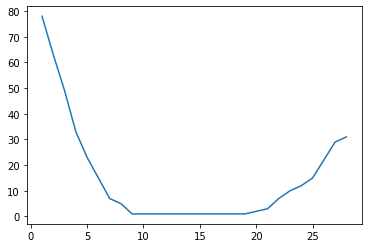

In [4]:
## visualizando a evolução do primeiro registro, nas 76 semanas
plt.plot(range(1,77),
         billboard.loc[0, #primeiro registro
                       'x1st.week':'x76th.week']) # colunas a serem exibidas

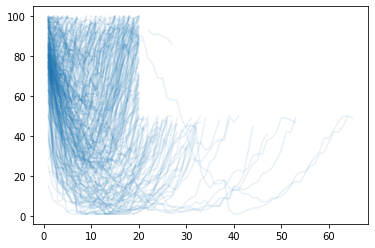

In [5]:
for index, row in billboard.iterrows():
  plt.plot(range(1,77),                   # posição x, quantidade de semanas
           row['x1st.week':'x76th.week'], # posição y, rank da musica
           color = 'C0',                  # cor
           alpha = 0.1,                   # transparência
           )
## observa-se que a maioria dos sons não ficam muito tempo no top

In [6]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

Formando um subconjunto dos dados

In [7]:
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered','x1st.week', 'x2nd.week', 'x3rd.week']]
bshort.tail()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN
316,Fragma,Toca's Miracle,3:22,2000-10-28,99,NaN,NaN


In [8]:
# alterando os nomes das colunas
bshort.columns = ['artist', 'track', 'time', 'date.entered','wk1','wk2','wk3']
bshort.tail()

,artist,track,time,date.entered,wk1,wk2,wk3
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN
316,Fragma,Toca's Miracle,3:22,2000-10-28,99,NaN,NaN


In [9]:
bmelt = bshort.melt(['artist', 'track', 'time', 'date.entered'], # colunas que serão preservadas
                    ['wk1','wk2','wk3'], # valores que serão reorganizados
                    'week', # nome da nova coluna 
                    'rank', # observação
                    )
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


Consultas aos dados. Observa-se que os 3 registros possuem a mesma data, que representa a data de entrada no rank


In [10]:
bmelt.query('track == "Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


### Tratando datas

Convertendo a semana em um número, definindo-o dinamicamente usando lambda. Para isso, usa-se um terceiro caractere em cada string, transformando-o em um número inteiro.

In [11]:
bmelt['week'] = bmelt['week'].apply(lambda w: int(w[2]))
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


Convertendo as string em datas

In [12]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])
bmelt['date.entered'].head()

0   2000-09-23
1   2000-02-12
2   1999-10-23
3   2000-08-12
4   2000-08-05
Name: date.entered, dtype: datetime64[ns]

operações com datas

In [13]:
print(f"Primeiro registro {bmelt['date.entered'][0]}")
print(f"Primeiro registro mais 7 dias {bmelt['date.entered'][0] + pd.Timedelta('7 days')}")

Primeiro registro 2000-09-23 00:00:00
Primeiro registro mais 7 dias 2000-09-30 00:00:00


Calculando o último dia que a música ficou no rank, para isso soma-se a data que a música chegou ao rank com o produto de 7 dias pela quantidade de semana que a música permaneceu.

In [14]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)
bmelt.tail(10)
# -1 pq a a data inicial 'date.entered' já é a semana de inicio ao rank

,artist,track,time,date.entered,week,rank,date
941,"Larrieux, Amel",Get Up,4:02,2000-03-04,3,97.0,2000-03-18
942,"Braxton, Toni",Spanish Guitar,4:24,2000-12-02,3,98.0,2000-12-16
943,Tuesday,I Know,4:06,2000-12-30,3,NaN,2001-01-13
944,LL Cool J,Imagine That,4:00,2000-08-12,3,NaN,2000-08-26
945,Master P,Souljas,3:33,2000-11-18,3,NaN,2000-12-02
946,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,3,NaN,2000-08-19
947,"Smith, Will",Freakin' It,3:58,2000-02-12,3,99.0,2000-02-26
948,Zombie Nation,Kernkraft 400,3:30,2000-09-02,3,NaN,2000-09-16
949,"Eastsidaz, The",Got Beef,3:58,2000-07-01,3,NaN,2000-07-15
950,Fragma,Toca's Miracle,3:22,2000-10-28,3,NaN,2000-11-11


por fim, excluindo a coluna de 'date.entered'

In [15]:
bmelt.drop(['date.entered'], # nome da coluna 
           axis = 1,         # 1 para coluna, 0 para linha
           inplace = True)   # alterar na base de dados
bmelt.head()

,artist,track,time,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1,71.0,1999-10-23
3,Madonna,Music,3:45,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,1,57.0,2000-08-05


Consultando os dados. Observa-se que agora as datas são diferentes.

In [16]:
bmelt.query('track == "Liar"')

,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [17]:
bfinal = bmelt[['artist','track','time','date','week','rank']]
bfinal.sort_values(['artist','track'], inplace=True)
bfinal.head(10)

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0
921,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-16,3,92.0
24,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
341,3 Doors Down,Kryptonite,3:53,2000-04-15,2,70.0
658,3 Doors Down,Kryptonite,3:53,2000-04-22,3,68.0
193,3 Doors Down,Loser,4:24,2000-10-21,1,76.0


Separando artista e música, para isso, é serão excluídos os registros que possuem mesma artista, mesmo nome e mesmo tempo de execução.

In [19]:
tracks = bfinal[['artist','track','time']].drop_duplicates()
tracks.head(10)

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35
22,98¡,Give Me Just One Night (Una Noche),3:24
304,A*Teens,Dancing Queen,3:44
135,Aaliyah,I Don't Wanna,4:15
14,Aaliyah,Try Again,4:03
200,"Adams, Yolanda",Open My Heart,5:30


Salvando os index como id

In [21]:
tracks.index.name = 'id'         #renomeando o index
tracksid = tracks.reset_index()  # resetando o index
tracksid.head() 

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


Merge entre as duas tabelas

In [24]:
pd.merge(tracksid, bfinal, 
         on=['track','artist','time'] # pelas colunas
         ).head()

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


Resumindo o conjunto de dados apenas com as informações relevantes

In [25]:
tidy = pd.merge(tracksid, bfinal, 
                on=['track','artist','time']         # unido pelas colunas
                ).drop(['track','artist','time'],    # excluindo as colunas
                       axis=1)                       # colunas
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


Acesso aos dados

In [31]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                   15.0
Name: 756, dtype: object

In [34]:
tidy[tidy.week == 1]['rank']

0      87.0
3      91.0
6      81.0
9      76.0
12     57.0
       ... 
936    86.0
939    85.0
942    95.0
945    99.0
948    60.0
Name: rank, Length: 317, dtype: float64

In [32]:
tracksid.query('id==1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18
